<center><h1>KOLHE_PRANAV_HW4</h1></center>
<br>
<br>

Name: Pranav Kolhe
<br>
Github Username: pranavko12
<br>
USC ID: 6981095982

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
import numpy as np
import pandas as pd
import os
from io import StringIO
from scipy.stats import bootstrap
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,auc
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Get the AReM Data Set

In [2]:
file_path = '../data/AReM/bending2/dataset4.csv'

with open(file_path, 'r') as f:
    data = f.readlines()

data_cleaned = [data[4]] + [line.strip() for line in data[5:]]

data_string = "\n".join(data_cleaned)
data_io = StringIO(data_string)

columns = ['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

df_bending_4 = pd.read_csv(data_io, sep=' ', header=None, skiprows=4)
df_bending_4.columns = columns

df_bending_4.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,500,32.75,0.43,1.00,0.00,18.00,0.00
1,750,32.50,0.50,0.00,0.00,17.50,0.50
2,1000,32.50,0.50,7.50,0.50,17.50,0.87
3,1250,32.67,0.47,11.00,1.00,16.75,0.83
4,1500,32.50,0.50,6.25,0.83,18.00,0.00


In [3]:
def clean_cycling_data(file_path):
    df = pd.read_csv(file_path, sep=',', skiprows=4, on_bad_lines='skip')
    return df

file_path_9 = '../data/AReM/cycling/dataset9.csv'
file_path_14 = '../data/AReM/cycling/dataset14.csv'

df_cycling_9 = clean_cycling_data(file_path_9)
df_cycling_14 = clean_cycling_data(file_path_14)

### (b) Splitting Data

In [4]:
base_path = "../data/AReM/"
folders = [
    "bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"
]
test_data = []
train_data = []
w_data = []

def load_and_separate_data():
    test_data = []
    train_data = []
    w_data = []
    
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
                
        if folder == "bending1":
            data_1 = pd.read_csv(os.path.join(folder_path, "dataset1.csv"), sep=',', skiprows=4)
            data_1['label'] = folder
            w_data.append(data_1)
            data_2 = pd.read_csv(os.path.join(folder_path, "dataset2.csv"), sep=',', skiprows=4)
            data_2['label'] = folder
            w_data.append(data_2)
            test_data.append(data_1)
            test_data.append(data_2)
            for i in range(3, 8):
                data = pd.read_csv(os.path.join(folder_path, f"dataset{i}.csv"), sep=',', skiprows=4)
                data['label'] = folder
                w_data.append(data)
                train_data.append(data)
        elif folder == "bending2":
            data_1 = pd.read_csv(os.path.join(folder_path, "dataset1.csv"), sep=',', skiprows=4)
            data_1['label'] = folder
            w_data.append(data_1)
            data_2 = pd.read_csv(os.path.join(folder_path, "dataset2.csv"), sep=',', skiprows=4)
            data_2['label'] = folder
            w_data.append(data_2)
            test_data.append(data_1)
            test_data.append(data_2)
            
            for i in range(3, 7):
                if i==4:
                    df_bending_4['label'] = folder
                    w_data.append(df_bending_4)
                    train_data.append(df_bending_4)
                else:
                    data = pd.read_csv(os.path.join(folder_path, f"dataset{i}.csv"), sep=',', skiprows=4)
                    data['label'] = folder
                    w_data.append(data)
                    train_data.append(data)
                    
        elif folder == "cycling":
            data_1 = pd.read_csv(os.path.join(folder_path, "dataset1.csv"), sep=',', skiprows=4)
            data_1['label'] = folder
            w_data.append(data_1)
            data_2 = pd.read_csv(os.path.join(folder_path, "dataset2.csv"), sep=',', skiprows=4)
            data_2['label'] = folder
            w_data.append(data_2)
            test_data.append(data_1)
            test_data.append(data_2)
            data_3 = pd.read_csv(os.path.join(folder_path, "dataset3.csv"), sep=',', skiprows=4)
            data_3['label'] = folder
            w_data.append(data_3)
            test_data.append(data_3)
            
            for i in range(4, 16):
                if i==9:
                    df_cycling_9["label"] = folder
                    w_data.append(df_cycling_9)
                    train_data.append(df_cycling_9)
                elif i==14:
                    df_cycling_14["label"] = folder
                    w_data.append(df_cycling_14)
                    train_data.append(df_cycling_14)
                else:
                    data = pd.read_csv(os.path.join(folder_path, f"dataset{i}.csv"), sep=',', skiprows=4)
                    data['label'] = folder
                    w_data.append(data)
                    train_data.append(data)        
        else:
            data_1 = pd.read_csv(os.path.join(folder_path, "dataset1.csv"), sep=',', skiprows=4)
            data_1['label'] = folder
            w_data.append(data_1)
            data_2 = pd.read_csv(os.path.join(folder_path, "dataset2.csv"), sep=',', skiprows=4)
            data_2['label'] = folder
            w_data.append(data_2)
            test_data.append(data_1)
            test_data.append(data_2)
            data_3 = pd.read_csv(os.path.join(folder_path, "dataset3.csv"), sep=',', skiprows=4)
            data_3['label'] = folder
            w_data.append(data_3)
            test_data.append(data_3)
            
            for i in range(4, 16):
                data = pd.read_csv(os.path.join(folder_path, f"dataset{i}.csv"), sep=',', skiprows=4)
                data['label'] = folder
                w_data.append(data)
                train_data.append(data)
                
    
    return train_data, test_data, w_data

train_data, test_data, w_data = load_and_separate_data()

### (c) Feature Extraction

In [5]:
col_names = ['min_', 'max_', 'mean_', 'median_', 'std_dev_', '1st quartile_', '3rd quartile_' ]
col = []
for i in range (1,7):
    for j in col_names:
        col.append(j + str(i))
        
df_2 = pd.DataFrame(columns=col)

def extract_features(d):
    summary = d.describe()
    
    row = []
    for i in range(1, 7):
        row.extend([
            summary.iloc[3, i],  
            summary.iloc[7, i],  
            summary.iloc[1, i],  
            summary.iloc[5, i],  
            summary.iloc[2, i],  
            summary.iloc[4, i],  
            summary.iloc[6, i],  
        ])
    
    return row

for i in w_data:
    row = extract_features(i)
    df_2 = pd.concat([df_2, pd.DataFrame([row], columns=col)], ignore_index=True)
     
df_2

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,std_dev_5,1st quartile_5,3rd quartile_5,min_6,max_6,mean_6,median_6,std_dev_6,1st quartile_6,3rd quartile_6
0,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
1,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
2,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400
3,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000
4,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,3.283983,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
84,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,3.119856,13.5000,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650
85,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,2.823124,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350
86,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,3.131076,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000


In [6]:
col_names = ['min_', 'max_', 'mean_', 'median_', 'std_dev_', '1st quartile_', '3rd quartile_' ]
col = []
for i in range (1,7):
    for j in col_names:
        col.append(j + str(i))
        
col.append('label')
df_train = pd.DataFrame(columns=col)

def extract_features(d):
    summary = d.describe()
    
    row = []
    for i in range(1, 7):
        row.extend([
            summary.iloc[3, i],  
            summary.iloc[7, i],  
            summary.iloc[1, i],  
            summary.iloc[5, i],  
            summary.iloc[2, i],  
            summary.iloc[4, i],  
            summary.iloc[6, i],  
        ])
    
    row.append(d['label'].iloc[0])
    
    return row

for i in train_data:
    row = extract_features(i)
    df_train = pd.concat([df_train, pd.DataFrame([row], columns=col)], ignore_index=True)

df_train

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,1st quartile_5,3rd quartile_5,min_6,max_6,mean_6,median_6,std_dev_6,1st quartile_6,3rd quartile_6,label
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,bending1
1,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,bending1
2,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,bending1
3,37.00,48.00,43.454958,43.25,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,22.2500,24.00,0.00,5.26,0.679646,0.50,0.622534,0.4300,0.8700,bending1
4,36.25,48.00,43.969125,44.50,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,20.5000,23.75,0.00,2.96,0.555312,0.49,0.487826,0.0000,0.8300,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,walking
65,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,13.5000,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650,walking
66,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,walking
67,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,walking


In [7]:
col_names = ['min_', 'max_', 'mean_', 'median_', 'std_dev_', '1st quartile_', '3rd quartile_' ]
col = []
for i in range (1,7):
    for j in col_names:
        col.append(j + str(i))
        
col.append('label')    
df_test = pd.DataFrame(columns=col)

for i in test_data:
    row = extract_features(i)
    df_test = pd.concat([df_test, pd.DataFrame([row], columns=col)], ignore_index=True)

df_test

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,1st quartile_5,3rd quartile_5,min_6,max_6,mean_6,median_6,std_dev_6,1st quartile_6,3rd quartile_6,label
0,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300,bending1
1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372437,...,32.0000,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300,bending1
2,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,20.5000,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870,bending2
3,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,15.0000,20.7500,0.0,6.76,1.122125,0.830,1.012342,0.4700,1.300,bending2
4,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,2.374208,...,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900,cycling
5,28.75,44.75,37.561187,36.875,3.226507,35.2500,40.2500,0.0,9.91,2.080687,...,18.0000,21.5000,0.0,9.62,2.765896,2.450,1.769203,1.4100,3.770,cycling
6,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,2.438146,...,16.0000,21.0000,0.0,8.55,2.983750,2.570,1.815730,1.5000,4.150,cycling
7,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,0.363687,...,5.5000,10.7500,0.0,4.50,0.734271,0.710,0.613688,0.4300,1.000,lying
8,24.75,48.33,44.182937,48.000,7.495615,48.0000,48.0000,0.0,3.11,0.101875,...,2.0000,5.5425,0.0,3.91,0.692771,0.500,0.675781,0.3225,0.940,lying
9,48.00,48.25,48.004167,48.000,0.032038,48.0000,48.0000,0.0,0.43,0.007167,...,4.6700,10.0000,0.0,2.50,0.641229,0.500,0.388372,0.4600,0.830,lying


## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

**FETAURES SELECTED IN HW 3:** 
1. Mean
2. Median
3. Std. Dev

**CODE EDITED FROM HW3:**<br>
1. Modified the splitting code to include label column to track the folders of data. This step helps us tackle the next question.
2. Since we were supposed to submit the merged data in HW3, I split it now as we need the train and test data for this HW.

In [8]:
bending_label = []

for i in df_train['label']:
    if i == 'bending1' or i == 'bending2':
        bending_label.append(1)
    else:
        bending_label.append(0)
        
df_train['bending_label'] = bending_label

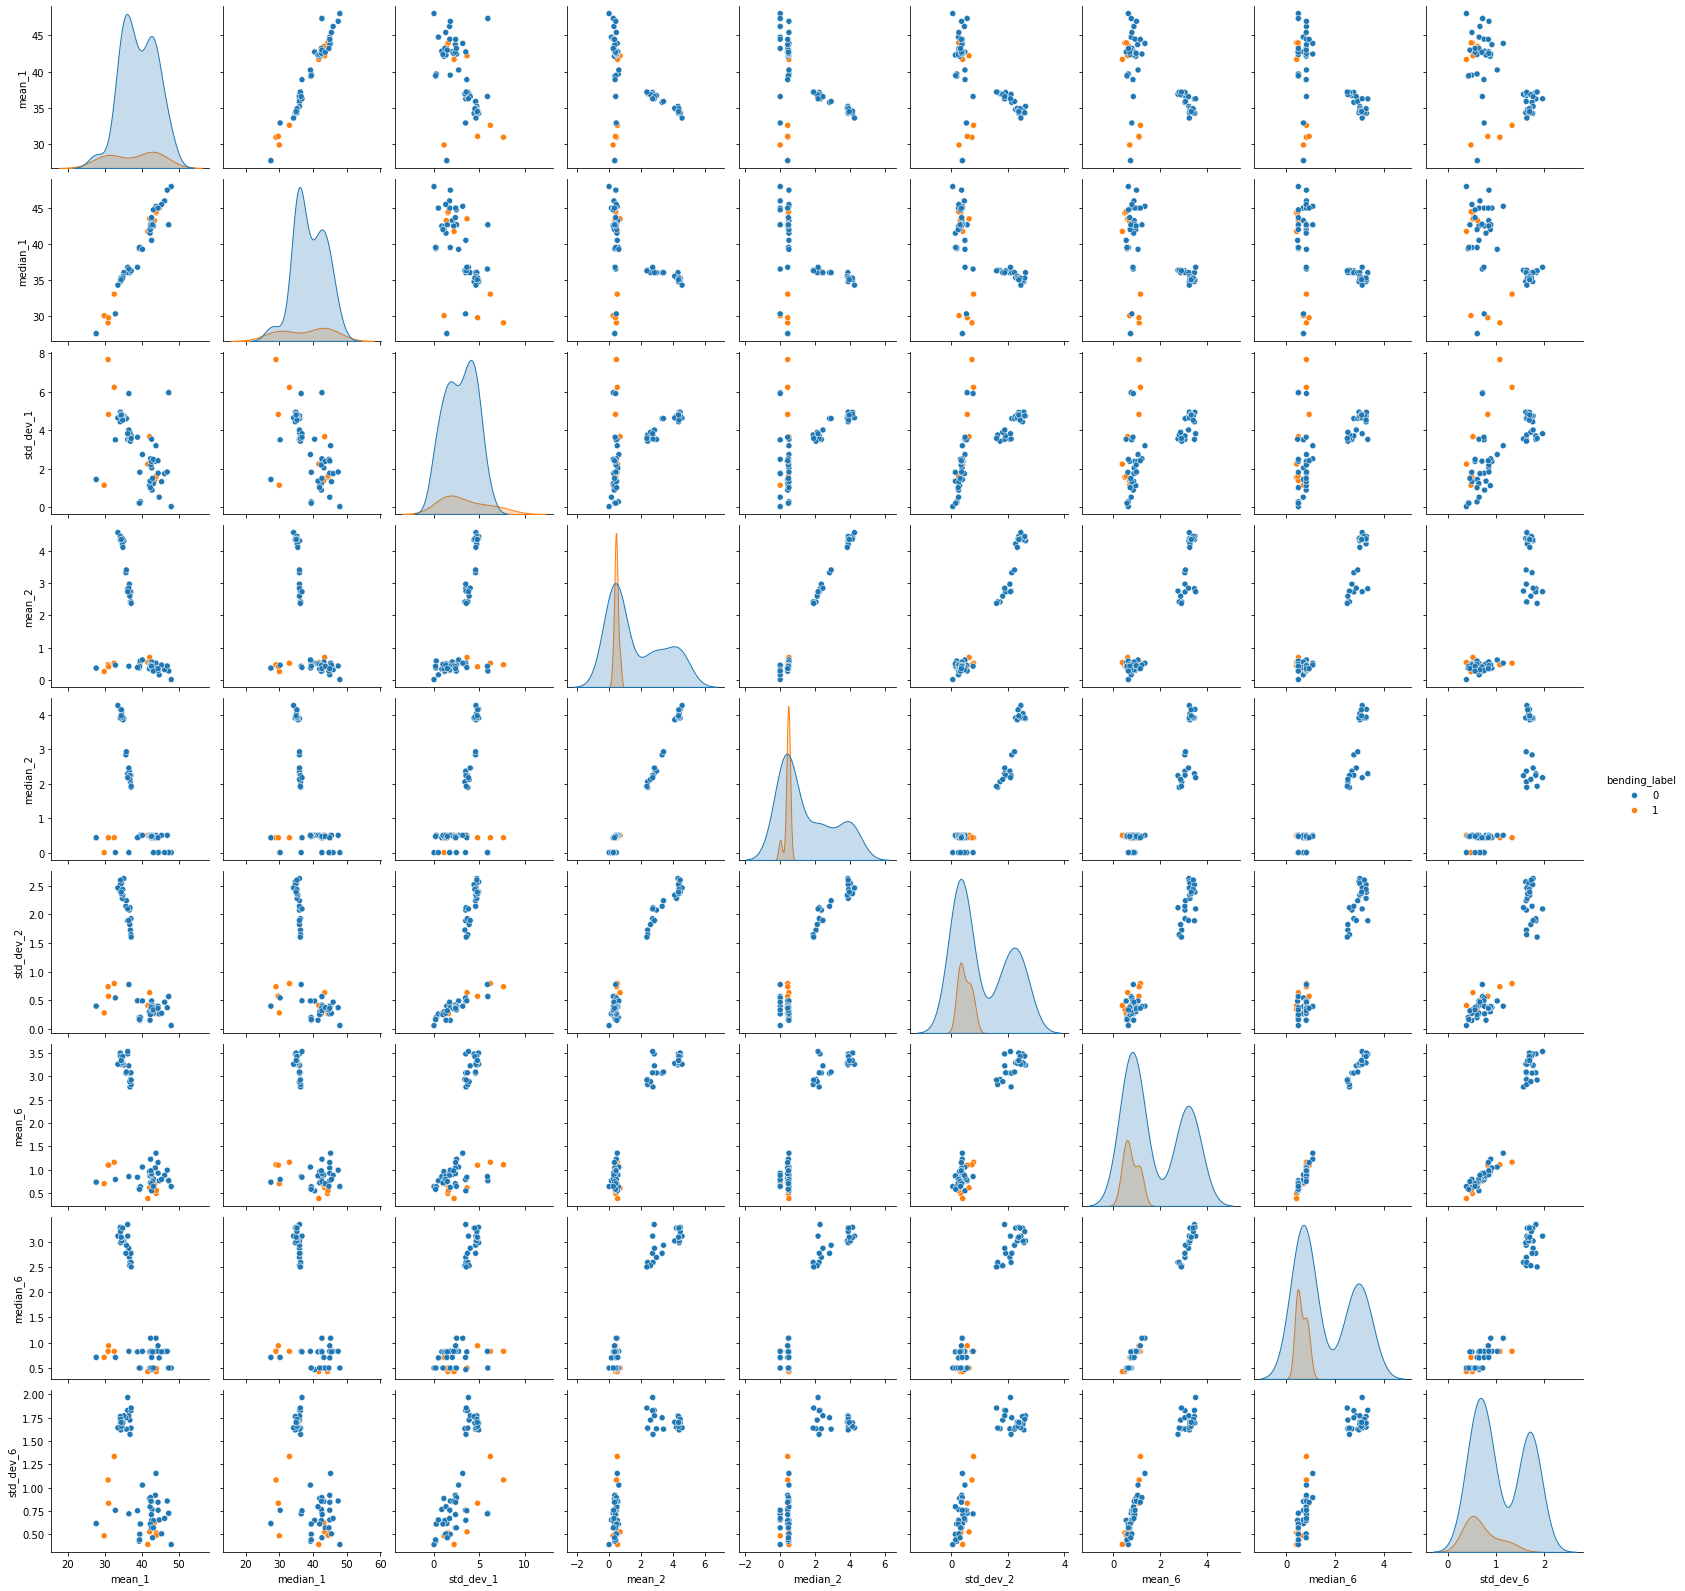

In [9]:
col_name = ["mean_1", "median_1", "std_dev_1","mean_2", "median_2", "std_dev_2","mean_6", "median_6", "std_dev_6","bending_label"]
sns.pairplot(df_train[col_name], hue='bending_label')
plt.show()

#### ii. Splitted Plots

In [10]:
col_names = ['min_', 'max_', 'mean_', 'median_', 'std_dev_', '1st quartile_', '3rd quartile_' ]
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
col = []
for i in range (1,13):
    for j in col_names:
        col.append(j + str(i))
        
col.append('label')

df_train_split = pd.DataFrame(columns=col)

for i in train_data:
    row = []
    for c in columns:
        value = i[c]
        mid = len(value) // 2
        first_half = value[:mid]
        second_half = value[mid:]
        
        for half in [first_half, second_half]:
            summary = half.describe()
            try:
                row.append(summary['min'])
                row.append(summary['max'])
                row.append(summary['mean'])
                row.append(summary['50%'])  
                row.append(summary['std'])
                row.append(summary['25%'])  
                row.append(summary['75%']) 
            except KeyError:
                row += [float("nan")] * 7
    
    row.append(i['label'].iloc[0])
    df_train_split = pd.concat([df_train_split, pd.DataFrame([row], columns=col)], ignore_index=True)
    
df_train_split

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,1st quartile_11,3rd quartile_11,min_12,max_12,mean_12,median_12,std_dev_12,1st quartile_12,3rd quartile_12,label
0,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,35.00,47.40,43.851833,...,0.00,1.0000,0.00,1.50,0.388333,0.000,0.478528,0.0000,0.7100,bending1
1,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,33.00,46.00,41.080750,...,0.00,1.2200,0.00,2.18,0.586083,0.470,0.491873,0.0000,0.8700,bending1
2,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,39.25,43.67,41.734917,...,0.00,0.7100,0.00,1.50,0.347500,0.430,0.363144,0.0000,0.5000,bending1
3,39.00,48.00,44.117042,45.000,1.359836,43.5000,45.0000,37.00,46.50,42.792875,...,0.43,1.1200,0.00,4.06,0.543875,0.500,0.473445,0.4300,0.7100,bending1
4,36.67,45.00,43.486208,43.710,1.281976,42.3300,44.5000,36.25,48.00,44.452042,...,0.00,0.8300,0.00,2.96,0.585750,0.500,0.487918,0.4225,0.8300,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,19.50,45.00,33.334500,34.000,4.874433,29.9375,36.8125,22.25,45.33,33.839250,...,2.06,4.2450,0.43,8.32,3.290292,3.155,1.646023,2.0500,4.4525,walking
65,20.33,44.50,34.036750,34.415,4.872880,30.7500,37.7500,19.75,45.50,34.608750,...,2.28,4.7900,0.00,9.67,3.321417,3.155,1.758379,2.0500,4.3950,walking
66,19.50,43.33,34.033875,35.000,4.758757,30.9375,37.5000,20.25,46.00,35.058583,...,2.15,4.1500,0.00,8.64,3.432208,3.255,1.691050,2.1600,4.5125,walking
67,24.33,44.00,34.920792,35.330,4.272282,32.2500,37.8125,23.50,46.25,34.825667,...,2.16,4.5850,0.00,9.51,3.418667,3.350,1.598536,2.1700,4.4525,walking


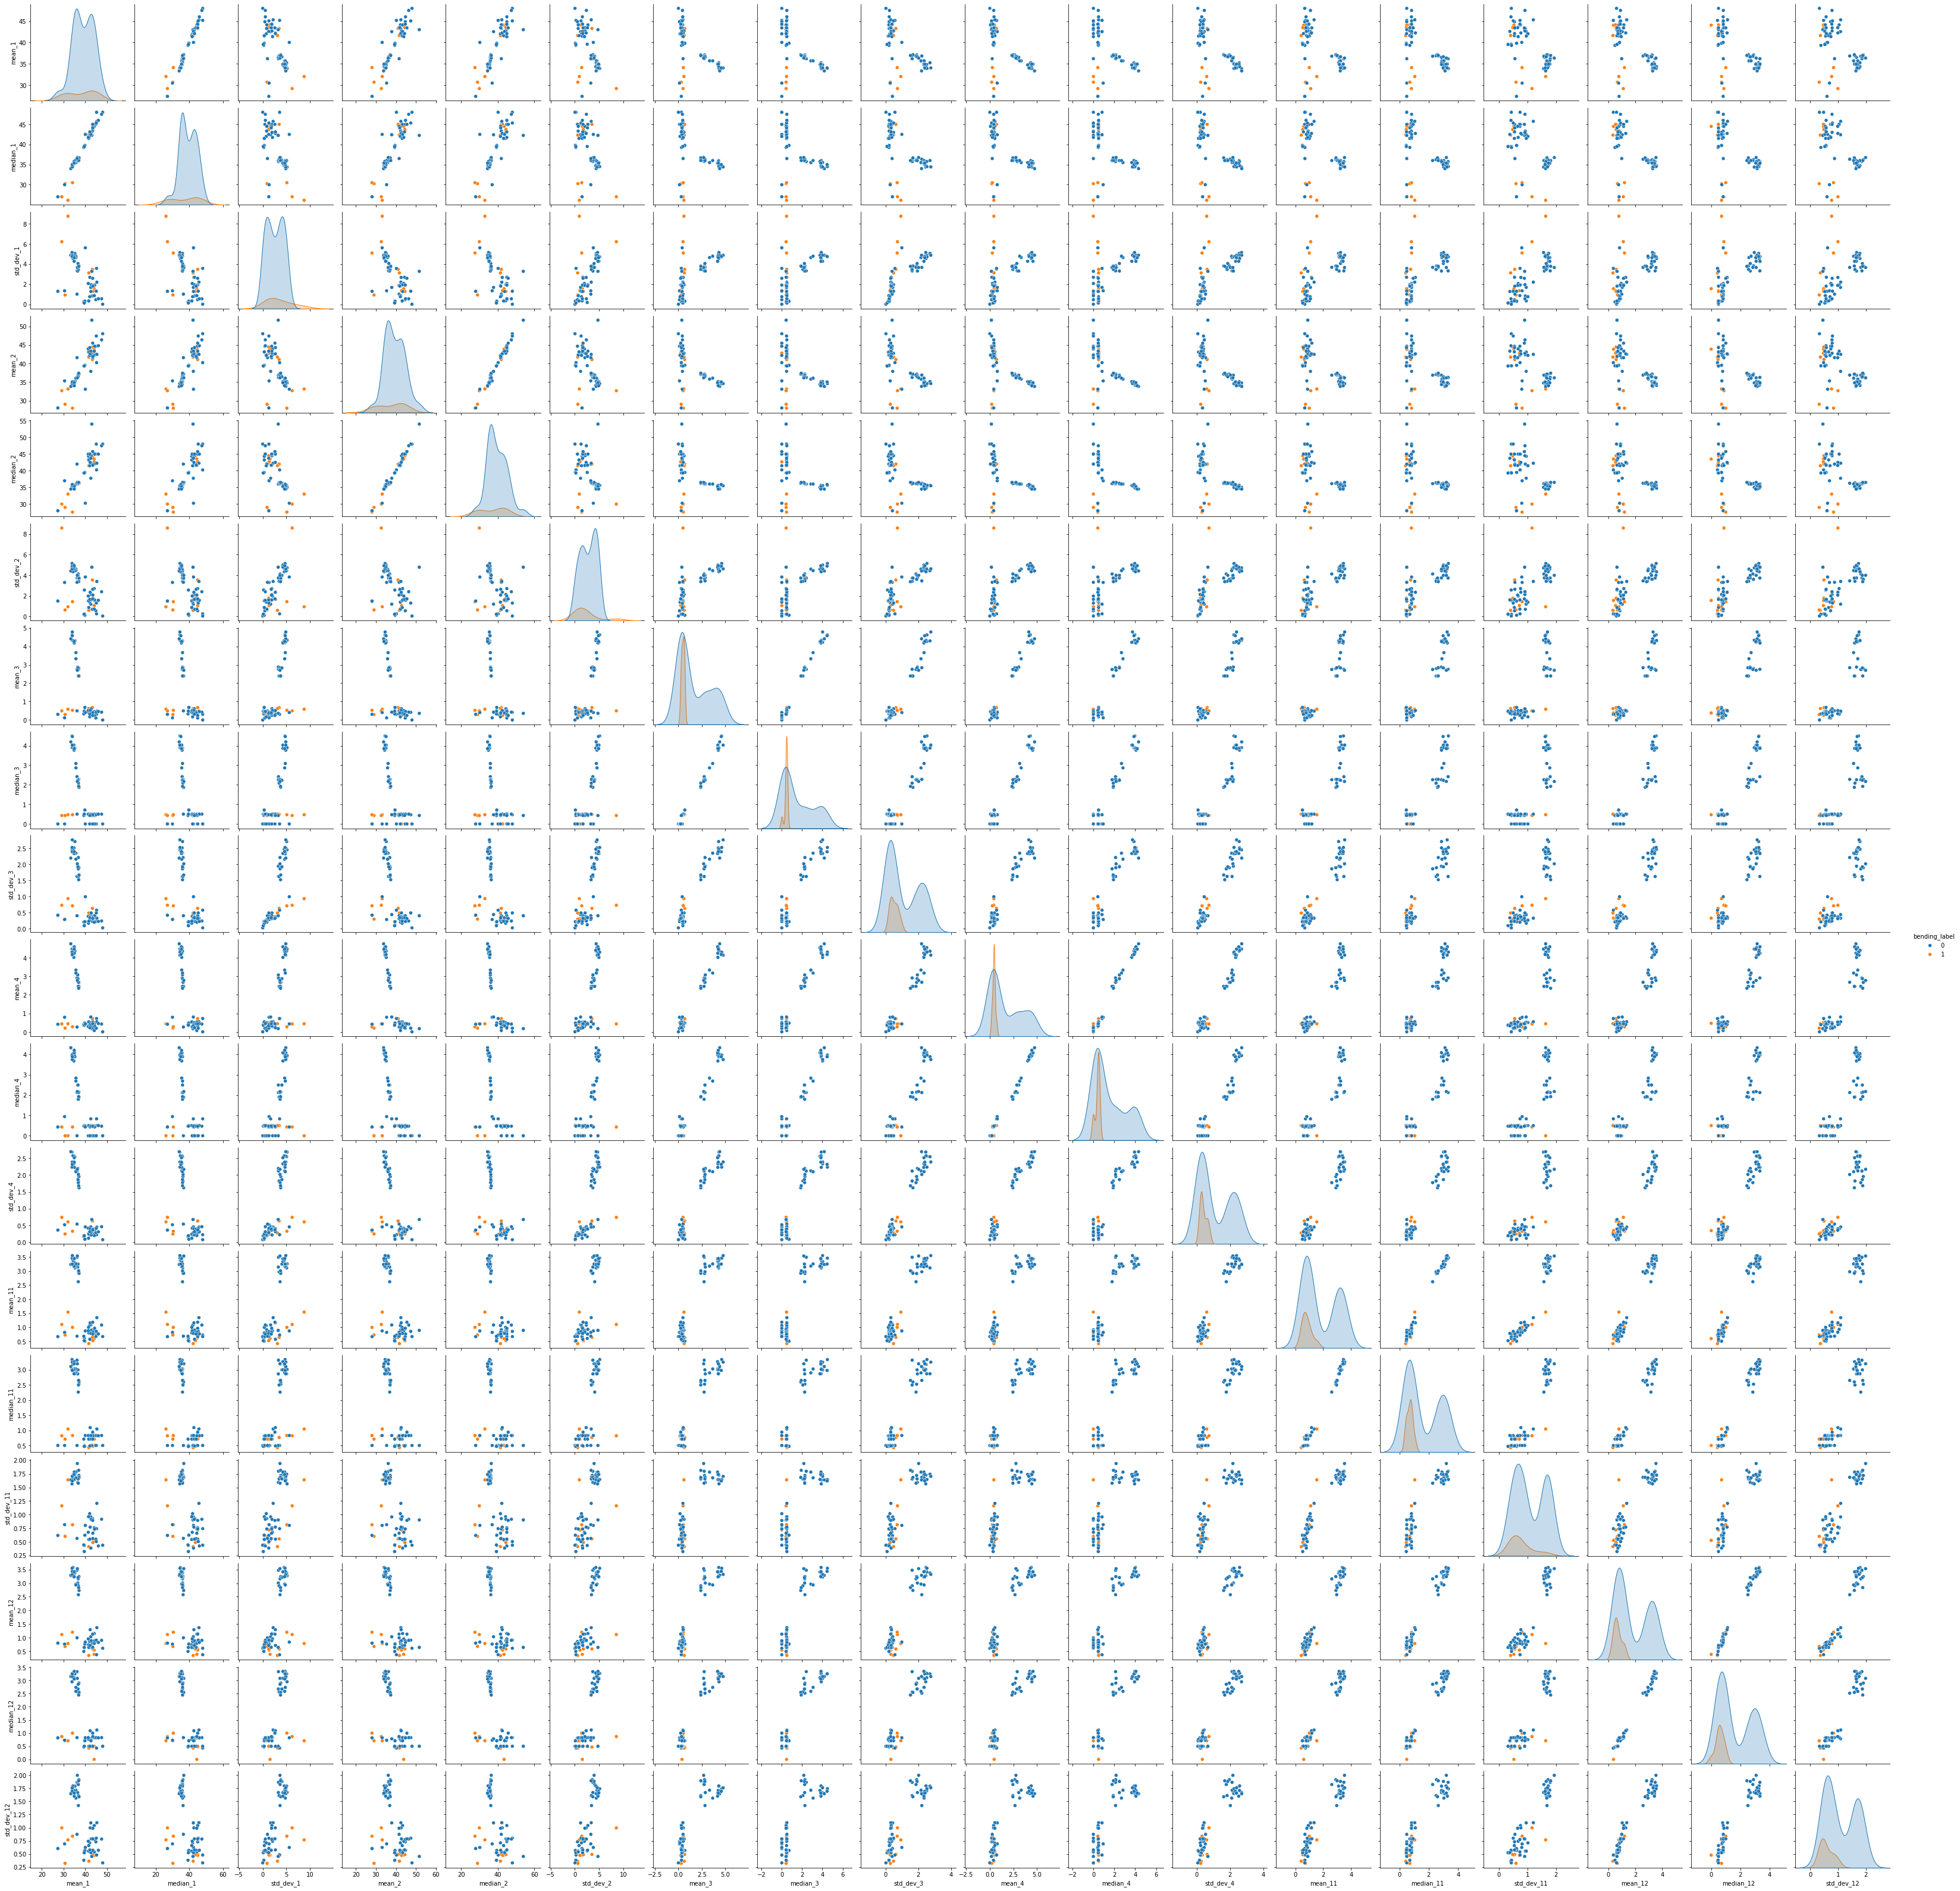

In [11]:
bending_label = []

for i in df_train_split['label']:
    if i == 'bending1' or i == 'bending2':
        bending_label.append(1)
    else:
        bending_label.append(0)
        
df_train_split['bending_label'] = bending_label
col_name = ["mean_1", "median_1", "std_dev_1","mean_2", "median_2", "std_dev_2","mean_3", "median_3", "std_dev_3", "mean_4", "median_4", "std_dev_4","mean_11", "median_11", "std_dev_11","mean_12", "median_12", "std_dev_12","bending_label"]

sns.pairplot(df_train_split[col_name], hue="bending_label")
plt.show()

**Q. Do you see any considerable difference in the results of 2(a)(ii) with those of 2(a)(i)?**<br><br>
**A.** There isn't a significant difference between the results of 2(a)(i) and 2(a)(ii).<br> 
While splitting the data doubles the number of features, it results in slightly more dispersed clusters in 2(a)(ii). However, the overall separation between bending and non-bending activities remains largely unchanged.

#### iii. Time Series Segments

In [12]:
l_value = []
p_value = []
error = []
accuracy = []
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

for l in range(1, 21):
    col = []
    for i in range(1, 6 * l + 1):
        for j in col_names:
            col.append(j + str(i))
        
    col.append('label')
    df_3 = pd.DataFrame(columns=col)
    
    for i in train_data:
        row = []
        
        for c in columns:
            value = i[c].values 
            n = len(value)
            size = n // l

            for j in range(l):
                start = j * size
                end = (j + 1) * size if j != l - 1 else n
                d = value[start:end]
                summary = pd.Series(d).describe()

                try:
                    row.append(summary['min'])
                    row.append(summary['max'])
                    row.append(summary['mean'])
                    row.append(summary['50%'])
                    row.append(summary['std'])
                    row.append(summary['25%'])
                    row.append(summary['75%'])
                except KeyError:
                    row += [float("nan")] * 7

        row.append(i['label'].iloc[0])
        df_3 = pd.concat([df_3, pd.DataFrame([row], columns=col)], ignore_index=True)
        
    bending_label = []

    for i in df_3['label']:
        if i == 'bending1' or i == 'bending2':
            bending_label.append(1)
        else:
            bending_label.append(0)

    df_3['bending_label'] = bending_label
    
    log_df = df_3
    print(f"Processing l = {l}...")

    X_train = log_df.drop(['label', 'bending_label'], axis=1)
    Y_train = log_df['bending_label']
    
    X_train = X_train.dropna()
    Y_train = Y_train[X_train.index]

    stratified = StratifiedKFold(n_splits=5)
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=100)

    rfe = RFECV(estimator=model, cv=stratified)
    rfe.fit(X_train, Y_train)
    best_score = max(rfe.cv_results_['mean_test_score'])
    best_p_value = rfe.n_features_
    best_error = 1 - best_score 
    
    l_value.append(l)
    p_value.append(best_p_value)
    error.append(best_error)
    accuracy.append(best_score)

res = pd.DataFrame({
    'l': l_value,
    'No. of features': p_value,
    'Error': error,
    'Accuracy': accuracy
})

display(res)

Processing l = 1...
Processing l = 2...
Processing l = 3...
Processing l = 4...
Processing l = 5...
Processing l = 6...
Processing l = 7...
Processing l = 8...
Processing l = 9...
Processing l = 10...
Processing l = 11...
Processing l = 12...
Processing l = 13...
Processing l = 14...
Processing l = 15...
Processing l = 16...
Processing l = 17...
Processing l = 18...
Processing l = 19...
Processing l = 20...


,l,No. of features,Error,Accuracy
0,1,4,0.000000,1.000000
1,2,14,0.014286,0.985714
2,3,6,0.014286,0.985714
3,4,19,0.000000,1.000000
4,5,20,0.014286,0.985714
5,6,20,0.014286,0.985714
6,7,2,0.028571,0.971429
7,8,230,0.029670,0.970330
8,9,31,0.014286,0.985714
9,10,17,0.028571,0.971429


Here, I have added Processing time.<br>It was taking a lot of time to get executed, so i wanted to track the progress of the loop

**Q. Explain what the right way and the wrong way are to perform cross-validation in this problem.**<br><br>
**A.** The correct approach, as implemented above, is to use RFECV (Recursive Feature Elimination with Cross-Validation), which combines both RFE (Recursive Feature Elimination) and Cross-Validation. The incorrect approach would have been to perform Cross-Validation before applying RFE.

#### iv. Confusion Matrix

In [13]:
best_acc = np.argmax(accuracy)
best_l_value = res['l'][best_acc]

col = []
l = best_l_value
for i in range(1, 6 * l + 1):
    for j in col_names:
        col.append(j + str(i))

col.append('label')
df_best = pd.DataFrame(columns=col)

for i in train_data:
    row = []

    for c in columns:
        value = i[c].values 
        n = len(value)
        size = n // l

        for j in range(l):
            start = j * size
            end = (j + 1) * size if j != l - 1 else n
            d = value[start:end]
            summary = pd.Series(d).describe()

            try:
                row.append(summary['min'])
                row.append(summary['max'])
                row.append(summary['mean'])
                row.append(summary['50%'])
                row.append(summary['std'])
                row.append(summary['25%'])
                row.append(summary['75%'])
            except KeyError:
                row += [float("nan")] * 7

    row.append(i['label'].iloc[0])
    df_best = pd.concat([df_best, pd.DataFrame([row], columns=col)], ignore_index=True)

bending_label = []

for i in df_best['label']:
    if i == 'bending1' or i == 'bending2':
        bending_label.append(1)
    else:
        bending_label.append(0)

df_best['bending_label'] = bending_label

df_best

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,3rd quartile_5,min_6,max_6,mean_6,median_6,std_dev_6,1st quartile_6,3rd quartile_6,label,bending_label
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,bending1,1
1,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,bending1,1
2,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,bending1,1
3,37.00,48.00,43.454958,43.25,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,24.00,0.00,5.26,0.679646,0.50,0.622534,0.4300,0.8700,bending1,1
4,36.25,48.00,43.969125,44.50,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,23.75,0.00,2.96,0.555312,0.49,0.487826,0.0000,0.8300,bending1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,walking,0
65,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650,walking,0
66,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,walking,0
67,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,walking,0


In [14]:
X_train = df_best.drop(['label', 'bending_label'], axis=1)
Y_train = df_best['bending_label']

X_train = X_train.dropna()
Y_train = Y_train[X_train.index]

model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=100)
rfe = RFECV(estimator=model, cv=stratified, scoring='accuracy')
rfe.fit(X_train, Y_train)

model_main = model.fit(X_train, Y_train)
Y_pred = rfe.predict(X_train)

**CONFUSION MATRIX:**

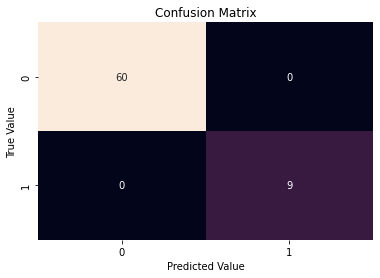

In [15]:
conf = confusion_matrix(Y_train, Y_pred)
fpr, tpr, threshold = roc_curve(Y_train, Y_pred)
roc_auc = auc(fpr, tpr)

ax= plt.subplot()
sns.heatmap(conf, annot=True, cbar= False, ax = ax);
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

**ROC and AUC**

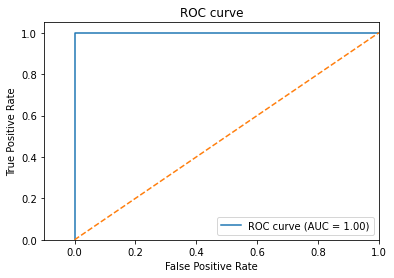

In [16]:
logit = sm.Logit(Y_train.values, X_train.values)
fpr, tpr, threshold = roc_curve(Y_train, Y_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [17]:
print("Logistic Regression Coefficients (βi's):")
print(pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]}))

Logistic Regression Coefficients (βi's):
           Feature  Coefficient
0            min_1    -0.316744
1            max_1    -0.187438
2           mean_1    -0.617830
3         median_1    -0.146737
4        std_dev_1    -0.204194
5   1st quartile_1    -0.316147
6   3rd quartile_1    -1.309988
7            min_2     0.000000
8            max_2    -0.572125
9           mean_2    -0.205586
10        median_2    -0.075713
11       std_dev_2    -0.153264
12  1st quartile_2    -0.086020
13  3rd quartile_2    -0.354560
14           min_3    -0.138020
15           max_3     0.277010
16          mean_3    -0.294183
17        median_3    -0.663102
18       std_dev_3    -0.213712
19  1st quartile_3     0.107782
20  3rd quartile_3    -0.733668
21           min_4     0.000000
22           max_4    -0.065031
23          mean_4    -0.197411
24        median_4    -0.208485
25       std_dev_4    -0.070869
26  1st quartile_4    -0.114546
27  3rd quartile_4    -0.253963
28           min_5     2.011138

In [18]:
x_cols = list(X_train.columns[rfe.support_])
X_train_new = X_train[x_cols]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=x_cols, index=X_train.index)
X_train_const = sm.add_constant(X_train_scaled_df)

model = sm.Logit(Y_train, X_train_const)
res = model.fit()

print(res.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          bending_label   No. Observations:                   69
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Mar 2025   Pseudo R-squ.:                   1.000
Time:                        14:40:26   Log-Likelihood:            -8.2977e-08
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 6.909e-11
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -76.2123   6.69e+05     -0.000      1.000   -1.31e+06    1.31e+06
3rd quartile_1   -20.4738   6.26e+04     -0.000      

#### v. Test Classifier

In [19]:
col = []
l = best_l_value
for i in range(1, 6 * l + 1):
    for j in col_names:
        col.append(j + str(i))

col.append('label')
df_best_test = pd.DataFrame(columns=col)

for i in test_data:
    row = []

    for c in columns:
        value = i[c].values 
        n = len(value)
        size = n // l

        for j in range(l):
            start = j * size
            end = (j + 1) * size if j != l - 1 else n
            d = value[start:end]
            summary = pd.Series(d).describe()

            try:
                row.append(summary['min'])
                row.append(summary['max'])
                row.append(summary['mean'])
                row.append(summary['50%'])
                row.append(summary['std'])
                row.append(summary['25%'])
                row.append(summary['75%'])
            except KeyError:
                row += [float("nan")] * 7

    row.append(i['label'].iloc[0])
    df_best_test = pd.concat([df_best_test, pd.DataFrame([row], columns=col)], ignore_index=True)

bending_label = []

for i in df_best_test['label']:
    if i == 'bending1' or i == 'bending2':
        bending_label.append(1)
    else:
        bending_label.append(0)

df_best_test['bending_label'] = bending_label

df_best_test

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,3rd quartile_5,min_6,max_6,mean_6,median_6,std_dev_6,1st quartile_6,3rd quartile_6,label,bending_label
0,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300,bending1,1
1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372437,...,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300,bending1,1
2,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870,bending2,1
3,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,20.7500,0.0,6.76,1.122125,0.830,1.012342,0.4700,1.300,bending2,1
4,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,2.374208,...,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900,cycling,0
5,28.75,44.75,37.561187,36.875,3.226507,35.2500,40.2500,0.0,9.91,2.080687,...,21.5000,0.0,9.62,2.765896,2.450,1.769203,1.4100,3.770,cycling,0
6,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,2.438146,...,21.0000,0.0,8.55,2.983750,2.570,1.815730,1.5000,4.150,cycling,0
7,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,0.363687,...,10.7500,0.0,4.50,0.734271,0.710,0.613688,0.4300,1.000,lying,0
8,24.75,48.33,44.182937,48.000,7.495615,48.0000,48.0000,0.0,3.11,0.101875,...,5.5425,0.0,3.91,0.692771,0.500,0.675781,0.3225,0.940,lying,0
9,48.00,48.25,48.004167,48.000,0.032038,48.0000,48.0000,0.0,0.43,0.007167,...,10.0000,0.0,2.50,0.641229,0.500,0.388372,0.4600,0.830,lying,0


In [20]:
X_test = df_best_test.drop(['bending_label','label'], axis=1)
Y_test = df_best_test['bending_label']

X_test = X_test.dropna()
Y_test = Y_test[X_test.index]

Y_test_pred = model_main.predict(X_test)

In [21]:
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

print("Cross-validation score (comparing the accuracy of train and test): ", rfe.score(X_test, Y_test))

Test Accuracy: 1.0000
Cross-validation score (comparing the accuracy of train and test):  1.0


**Q. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.**

**A.** The accuracy of the test set is same as the cross-validation accuracy

**CONFUSION MATRIX**

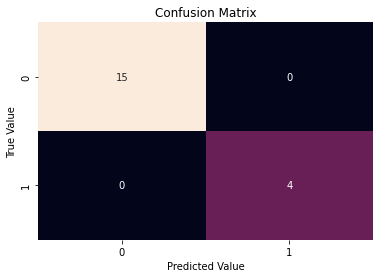

In [22]:
conf = confusion_matrix(Y_test, Y_test_pred)
fpr, tpr, threshold = roc_curve(Y_test, Y_test_pred)
roc_auc = auc(fpr, tpr)

ax= plt.subplot()
sns.heatmap(conf, annot=True, cbar= False, ax = ax);
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

**ROC AND AUC**

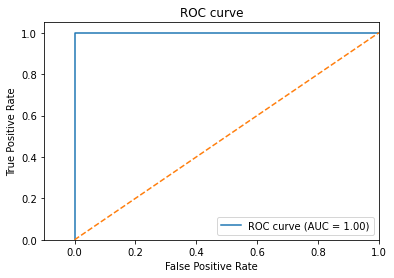

In [23]:
logit = sm.Logit(Y_test.values, X_test.values)
fpr, tpr, threshold = roc_curve(Y_test, Y_test_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

#### vi. Separation

**Q. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?**<br><br>
**A.** Yes, the classes appear to be well-separated, as indicated by the p-value of 1 for the estimators. This suggests that the predictors are almost perfectly distinguishing between the two classes, leading to instability in estimating the logistic regression parameters.

#### vii. Imbalance

**Q. From the confusion matrices you obtained, do you see imbalanced classes?**<br><br>
**A.** Yes, I see imbalanced classes. <br>
In the training data, we have 9 true negatives for the 60 true positives values. <br>
In the test data, we have 4 true negatives for the 15 true positives values.<br>
Hence, one class has significant value count, suggesting class imbalance.

**LOGISTIC REGRESSION MODEL BASED ON CASE-CONTROL SAMPLING**

In [24]:
l_value = []
p_value = []
error = []
accuracy = []
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

for l in range(1, 21):
    col = []
    for i in range(1, 6 * l + 1):
        for j in col_names:
            col.append(j + str(i))
        
    col.append('label')
    df_5 = pd.DataFrame(columns=col)
    
    for i in train_data:
        row = []
        
        for c in columns:
            value = i[c].values 
            n = len(value)
            size = n // l

            for j in range(l):
                start = j * size
                end = (j + 1) * size if j != l - 1 else n
                d = value[start:end]
                summary = pd.Series(d).describe()

                try:
                    row.append(summary['min'])
                    row.append(summary['max'])
                    row.append(summary['mean'])
                    row.append(summary['50%'])
                    row.append(summary['std'])
                    row.append(summary['25%'])
                    row.append(summary['75%'])
                except KeyError:
                    row += [float("nan")] * 7

        row.append(i['label'].iloc[0])
        df_5 = pd.concat([df_5, pd.DataFrame([row], columns=col)], ignore_index=True)
        
    bending_label = []

    for i in df_5['label']:
        if i == 'bending1' or i == 'bending2':
            bending_label.append(1)
        else:
            bending_label.append(0)

    df_5['bending_label'] = bending_label
    
    log_df = df_5
    print(f"Processing l = {l}...")

    X_train = log_df.drop(['label', 'bending_label'], axis=1)
    Y_train = log_df['bending_label']
    
    X_train = X_train.dropna()
    Y_train = Y_train[X_train.index]
    
    smt = SMOTE()
    X_train_sm, Y_train_sm = smt.fit_resample(X_train, Y_train)
    
    stratified = StratifiedKFold(n_splits=5)
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=100)

    rfe = RFECV(estimator=model, cv=stratified)
    rfe.fit(X_train_sm, Y_train_sm)
    best_score = max(rfe.cv_results_['mean_test_score'])
    best_p_value = rfe.n_features_
    best_error = 1 - best_score 
    
    l_value.append(l)
    p_value.append(best_p_value)
    error.append(best_error)
    accuracy.append(best_score)

res = pd.DataFrame({
    'l': l_value,
    'No. of features': p_value,
    'Error': error,
    'Accuracy': accuracy
})

display(res)

Processing l = 1...
Processing l = 2...
Processing l = 3...
Processing l = 4...
Processing l = 5...
Processing l = 6...
Processing l = 7...
Processing l = 8...
Processing l = 9...
Processing l = 10...
Processing l = 11...
Processing l = 12...
Processing l = 13...
Processing l = 14...
Processing l = 15...
Processing l = 16...
Processing l = 17...
Processing l = 18...
Processing l = 19...
Processing l = 20...


,l,No. of features,Error,Accuracy
0,1,5,0.016667,0.983333
1,2,6,0.000000,1.000000
2,3,5,0.000000,1.000000
3,4,5,0.000000,1.000000
4,5,9,0.000000,1.000000
5,6,9,0.000000,1.000000
6,7,4,0.000000,1.000000
7,8,8,0.008333,0.991667
8,9,4,0.008333,0.991667
9,10,4,0.000000,1.000000


In [25]:
best_acc = np.argmax(accuracy)
best_l_value = res['l'][best_acc]

col = []
l = best_l_value
for i in range(1, 6 * l + 1):
    for j in col_names:
        col.append(j + str(i))

col.append('label')
df_best = pd.DataFrame(columns=col)

for i in train_data:
    row = []

    for c in columns:
        value = i[c].values 
        n = len(value)
        size = n // l

        for j in range(l):
            start = j * size
            end = (j + 1) * size if j != l - 1 else n
            d = value[start:end]
            summary = pd.Series(d).describe()

            try:
                row.append(summary['min'])
                row.append(summary['max'])
                row.append(summary['mean'])
                row.append(summary['50%'])
                row.append(summary['std'])
                row.append(summary['25%'])
                row.append(summary['75%'])
            except KeyError:
                row += [float("nan")] * 7

    row.append(i['label'].iloc[0])
    df_best = pd.concat([df_best, pd.DataFrame([row], columns=col)], ignore_index=True)

bending_label = []

for i in df_best['label']:
    if i == 'bending1' or i == 'bending2':
        bending_label.append(1)
    else:
        bending_label.append(0)

df_best['bending_label'] = bending_label

df_best

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,3rd quartile_11,min_12,max_12,mean_12,median_12,std_dev_12,1st quartile_12,3rd quartile_12,label,bending_label
0,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,35.00,47.40,43.851833,...,1.0000,0.00,1.50,0.388333,0.000,0.478528,0.0000,0.7100,bending1,1
1,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,33.00,46.00,41.080750,...,1.2200,0.00,2.18,0.586083,0.470,0.491873,0.0000,0.8700,bending1,1
2,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,39.25,43.67,41.734917,...,0.7100,0.00,1.50,0.347500,0.430,0.363144,0.0000,0.5000,bending1,1
3,39.00,48.00,44.117042,45.000,1.359836,43.5000,45.0000,37.00,46.50,42.792875,...,1.1200,0.00,4.06,0.543875,0.500,0.473445,0.4300,0.7100,bending1,1
4,36.67,45.00,43.486208,43.710,1.281976,42.3300,44.5000,36.25,48.00,44.452042,...,0.8300,0.00,2.96,0.585750,0.500,0.487918,0.4225,0.8300,bending1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,19.50,45.00,33.334500,34.000,4.874433,29.9375,36.8125,22.25,45.33,33.839250,...,4.2450,0.43,8.32,3.290292,3.155,1.646023,2.0500,4.4525,walking,0
65,20.33,44.50,34.036750,34.415,4.872880,30.7500,37.7500,19.75,45.50,34.608750,...,4.7900,0.00,9.67,3.321417,3.155,1.758379,2.0500,4.3950,walking,0
66,19.50,43.33,34.033875,35.000,4.758757,30.9375,37.5000,20.25,46.00,35.058583,...,4.1500,0.00,8.64,3.432208,3.255,1.691050,2.1600,4.5125,walking,0
67,24.33,44.00,34.920792,35.330,4.272282,32.2500,37.8125,23.50,46.25,34.825667,...,4.5850,0.00,9.51,3.418667,3.350,1.598536,2.1700,4.4525,walking,0


In [26]:
X_train_2 = df_best.drop(['label', 'bending_label'], axis=1)
Y_train_2 = df_best['bending_label']

X_train_2 = X_train_2.dropna()
Y_train_2 = Y_train_2[X_train_2.index]

smt = SMOTE()
X_train_sm, Y_train_sm = smt.fit_resample(X_train_2, Y_train_2)

model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=100)
rfe = RFECV(estimator=model, cv=stratified, scoring='accuracy')
rfe.fit(X_train_sm, Y_train_sm)

model_main = model.fit(X_train_sm, Y_train_sm)
Y_pred = rfe.predict(X_train_sm)

**CONFUSION MATRIX**

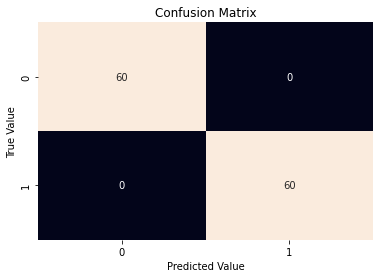

In [27]:
conf = confusion_matrix(Y_train_sm, Y_pred)
fpr, tpr, threshold = roc_curve(Y_train_sm, Y_pred)
roc_auc = auc(fpr, tpr)

ax= plt.subplot()
sns.heatmap(conf, annot=True, cbar= False, ax = ax);
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

**ROC and AUC**

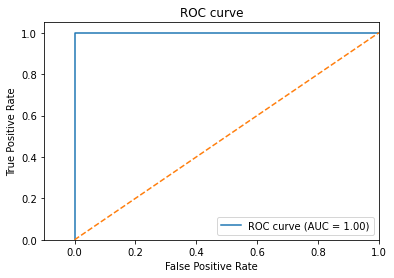

In [28]:
logit = sm.Logit(Y_train_sm.values, X_train_sm.values)
fpr, tpr, threshold = roc_curve(Y_train_sm, Y_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [29]:
l_value = []
error = []
accuracy = []
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

for l in range(1, 21):
    col = []
    for i in range(1, 6 * l + 1):
        for j in col_names:
            col.append(j + str(i))
        
    col.append('label')
    df_6 = pd.DataFrame(columns=col)
    
    for i in train_data:
        row = []
        
        for c in columns:
            value = i[c].values 
            n = len(value)
            size = n // l

            for j in range(l):
                start = j * size
                end = (j + 1) * size if j != l - 1 else n
                d = value[start:end]
                summary = pd.Series(d).describe()

                try:
                    row.append(summary['min'])
                    row.append(summary['max'])
                    row.append(summary['mean'])
                    row.append(summary['50%'])
                    row.append(summary['std'])
                    row.append(summary['25%'])
                    row.append(summary['75%'])
                except KeyError:
                    row += [float("nan")] * 7

        row.append(i['label'].iloc[0])
        df_6 = pd.concat([df_6, pd.DataFrame([row], columns=col)], ignore_index=True)
        
    bending_label = []

    for i in df_6['label']:
        if i == 'bending1' or i == 'bending2':
            bending_label.append(1)
        else:
            bending_label.append(0)

    df_6['bending_label'] = bending_label
    
    log_df = df_6
    print(f"Processing l = {l}...")

    X_train = log_df.drop(['label', 'bending_label'], axis=1)
    Y_train = log_df['bending_label']
    
    X_train = X_train.dropna()
    Y_train = Y_train[X_train.index]
    
    param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
    
    model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=100)
    grid_search = GridSearchCV(model, param_grid, cv=stratified, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    best_score = grid_search.best_score_
    best_c_value = grid_search.best_params_['C']
    best_error = 1 - best_score
    
    l_value.append(l)
    error.append(best_error)
    accuracy.append(best_score)

res = pd.DataFrame({
    'l': l_value,
    'Error': error,
    'Accuracy': accuracy
})

display(res)

Processing l = 1...
Processing l = 2...
Processing l = 3...
Processing l = 4...
Processing l = 5...
Processing l = 6...
Processing l = 7...
Processing l = 8...
Processing l = 9...
Processing l = 10...
Processing l = 11...
Processing l = 12...
Processing l = 13...
Processing l = 14...
Processing l = 15...
Processing l = 16...
Processing l = 17...
Processing l = 18...
Processing l = 19...
Processing l = 20...


,l,Error,Accuracy
0,1,0.014286,0.985714
1,2,0.014286,0.985714
2,3,0.014286,0.985714
3,4,0.028571,0.971429
4,5,0.043956,0.956044
5,6,0.042857,0.957143
6,7,0.028571,0.971429
7,8,0.043956,0.956044
8,9,0.043956,0.956044
9,10,0.043956,0.956044


In [30]:
best_acc = np.argmax(accuracy)
best_l_value = res['l'][best_acc]

col = []
l = best_l_value
for i in range(1, 6 * l + 1):
    for j in col_names:
        col.append(j + str(i))

col.append('label')
df_best = pd.DataFrame(columns=col)

for i in train_data:
    row = []

    for c in columns:
        value = i[c].values 
        n = len(value)
        size = n // l

        for j in range(l):
            start = j * size
            end = (j + 1) * size if j != l - 1 else n
            d = value[start:end]
            summary = pd.Series(d).describe()

            try:
                row.append(summary['min'])
                row.append(summary['max'])
                row.append(summary['mean'])
                row.append(summary['50%'])
                row.append(summary['std'])
                row.append(summary['25%'])
                row.append(summary['75%'])
            except KeyError:
                row += [float("nan")] * 7

    row.append(i['label'].iloc[0])
    df_best = pd.concat([df_best, pd.DataFrame([row], columns=col)], ignore_index=True)

bending_label = []

for i in df_best['label']:
    if i == 'bending1' or i == 'bending2':
        bending_label.append(1)
    else:
        bending_label.append(0)

df_best['bending_label'] = bending_label

df_best

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,3rd quartile_5,min_6,max_6,mean_6,median_6,std_dev_6,1st quartile_6,3rd quartile_6,label,bending_label
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,bending1,1
1,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,bending1,1
2,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,bending1,1
3,37.00,48.00,43.454958,43.25,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,24.00,0.00,5.26,0.679646,0.50,0.622534,0.4300,0.8700,bending1,1
4,36.25,48.00,43.969125,44.50,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,23.75,0.00,2.96,0.555312,0.49,0.487826,0.0000,0.8300,bending1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,walking,0
65,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650,walking,0
66,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,walking,0
67,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,walking,0


In [31]:
X_train_3 = df_best.drop(['label', 'bending_label'], axis=1)
Y_train_3 = df_best['bending_label']

X_train_3 = X_train_3.dropna()
Y_train_3 = Y_train_3[X_train_3.index]

model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=100)
rfe = RFECV(estimator=model, cv=stratified, scoring='accuracy')
rfe.fit(X_train_3, Y_train_3)

model_main = model.fit(X_train_3, Y_train_3)
Y_pred = rfe.predict(X_train_3)

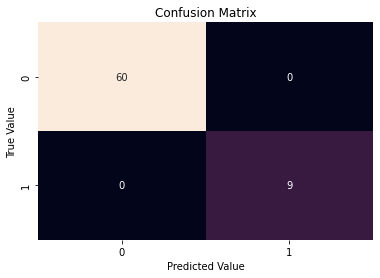

In [32]:
conf = confusion_matrix(Y_train_3, Y_pred)
fpr, tpr, threshold = roc_curve(Y_train_3, Y_pred)
roc_auc = auc(fpr, tpr)

ax= plt.subplot()
sns.heatmap(conf, annot=True, cbar= False, ax = ax);
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

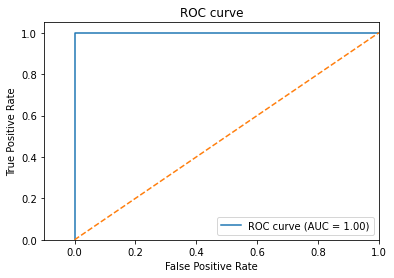

In [33]:
logit = sm.Logit(Y_train_3.values, X_train_3.values)
fpr, tpr, threshold = roc_curve(Y_train_3, Y_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

#### ii. Comparison

**Q. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?** <br><br>
**A.** The accuracy achieved through variable selection with p-values is higher than that of the L1-penalized approach. While all the accuracy values using p-values are around 0.97-1, with few values being 1, all accuracy values using l1 penalized is lower than that.<br><br>
When it comes to execution, L1 penalized is easier to execute as it runs faster than p-value.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [34]:
l_value = []
error = []
accuracy = []
t_error = []
t_accuracy = []
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

for l in range(1, 21):
    col = []
    for i in range(1, 6 * l + 1):
        for j in col_names:
            col.append(j + str(i))
        
    col.append('label')
    df_7 = pd.DataFrame(columns=col)
    
    for i in train_data:
        row = []
        
        for c in columns:
            value = i[c].values 
            n = len(value)
            size = n // l

            for j in range(l):
                start = j * size
                end = (j + 1) * size if j != l - 1 else n
                d = value[start:end]
                summary = pd.Series(d).describe()

                try:
                    row.append(summary['min'])
                    row.append(summary['max'])
                    row.append(summary['mean'])
                    row.append(summary['50%'])
                    row.append(summary['std'])
                    row.append(summary['25%'])
                    row.append(summary['75%'])
                except KeyError:
                    row += [float("nan")] * 7

        row.append(i['label'].iloc[0])
        df_7 = pd.concat([df_7, pd.DataFrame([row], columns=col)], ignore_index=True)
        
    bending_label = []

    for i in df_7['label']:
        if i == 'bending1' or i == 'bending2':
            bending_label.append(1)
        else:
            bending_label.append(0)

    df_7['bending_label'] = bending_label
    
    log_df_train = df_7
    print(f"Processing l = {l}...")

    X_train = log_df.drop(['label', 'bending_label'], axis=1)
    Y_train = log_df['bending_label']
    
    X_train = X_train.dropna()
    Y_train = Y_train[X_train.index]
    
    model = LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga', max_iter=5000)
    model.fit(X_train, Y_train)
    
    best_score = model.score(X_train, Y_train)
    best_error = 1 - best_score
    
    l_value.append(l)
    error.append(best_error)
    accuracy.append(best_score)

Processing l = 1...
Processing l = 2...
Processing l = 3...
Processing l = 4...
Processing l = 5...
Processing l = 6...
Processing l = 7...
Processing l = 8...
Processing l = 9...
Processing l = 10...
Processing l = 11...
Processing l = 12...
Processing l = 13...
Processing l = 14...
Processing l = 15...
Processing l = 16...
Processing l = 17...
Processing l = 18...
Processing l = 19...
Processing l = 20...


In [35]:
for l in range(1, 21):
    col = []
    for i in range(1, 6 * l + 1):
        for j in col_names:
            col.append(j + str(i))
        
    col.append('label')
    df_8 = pd.DataFrame(columns=col)
    
    for i in test_data:
        row = []
        
        for c in columns:
            value = i[c].values 
            n = len(value)
            size = n // l

            for j in range(l):
                start = j * size
                end = (j + 1) * size if j != l - 1 else n
                d = value[start:end]
                summary = pd.Series(d).describe()

                try:
                    row.append(summary['min'])
                    row.append(summary['max'])
                    row.append(summary['mean'])
                    row.append(summary['50%'])
                    row.append(summary['std'])
                    row.append(summary['25%'])
                    row.append(summary['75%'])
                except KeyError:
                    row += [float("nan")] * 7

        row.append(i['label'].iloc[0])
        df_8 = pd.concat([df_8, pd.DataFrame([row], columns=col)], ignore_index=True)
        
    bending_label = []

    for i in df_8['label']:
        if i == 'bending1' or i == 'bending2':
            bending_label.append(1)
        else:
            bending_label.append(0)

    df_8['bending_label'] = bending_label
    
    log_df_test = df_8
    print(f"Processing l = {l}...")
    
    X_test = log_df_test.drop(['label'], axis=1)
    Y_test = log_df_test['label']
    
    X_test = X_test.dropna()
    Y_test = Y_test[X_test.index]
    
    model = LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga', max_iter=5000)
    model.fit(X_test, Y_test)
    
    best_test_score = model.score(X_test,Y_test)
    best_test_error = 1 - best_test_score

Processing l = 1...
Processing l = 2...
Processing l = 3...
Processing l = 4...
Processing l = 5...
Processing l = 6...
Processing l = 7...
Processing l = 8...
Processing l = 9...
Processing l = 10...
Processing l = 11...
Processing l = 12...
Processing l = 13...
Processing l = 14...
Processing l = 15...
Processing l = 16...
Processing l = 17...
Processing l = 18...
Processing l = 19...
Processing l = 20...


In [36]:
res = pd.DataFrame({
    'l': l_value,
    'Train Error': error,
    'Train Accuracy': accuracy,
    'Test Accuracy': best_test_score,
    'Test Error': best_test_error
})

display(res)

,l,Train Error,Train Accuracy,Test Accuracy,Test Error
0,1,0.0,1.0,1.0,0.0
1,2,0.0,1.0,1.0,0.0
2,3,0.0,1.0,1.0,0.0
3,4,0.0,1.0,1.0,0.0
4,5,0.0,1.0,1.0,0.0
5,6,0.0,1.0,1.0,0.0
6,7,0.0,1.0,1.0,0.0
7,8,0.0,1.0,1.0,0.0
8,9,0.0,1.0,1.0,0.0
9,10,0.0,1.0,1.0,0.0


In [37]:
best_acc = np.argmax(accuracy)
best_l_value = res['l'][best_acc]

col = []
l = best_l_value
for i in range(1, 6 * l + 1):
    for j in col_names:
        col.append(j + str(i))

col.append('label')
df_best = pd.DataFrame(columns=col)

for i in train_data:
    row = []

    for c in columns:
        value = i[c].values 
        n = len(value)
        size = n // l

        for j in range(l):
            start = j * size
            end = (j + 1) * size if j != l - 1 else n
            d = value[start:end]
            summary = pd.Series(d).describe()

            try:
                row.append(summary['min'])
                row.append(summary['max'])
                row.append(summary['mean'])
                row.append(summary['50%'])
                row.append(summary['std'])
                row.append(summary['25%'])
                row.append(summary['75%'])
            except KeyError:
                row += [float("nan")] * 7

    row.append(i['label'].iloc[0])
    df_best = pd.concat([df_best, pd.DataFrame([row], columns=col)], ignore_index=True)

bending_label = []

for i in df_best['label']:
    if i == 'bending1' or i == 'bending2':
        bending_label.append(1)
    else:
        bending_label.append(0)

df_best['bending_label'] = bending_label

df_best

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,3rd quartile_5,min_6,max_6,mean_6,median_6,std_dev_6,1st quartile_6,3rd quartile_6,label,bending_label
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,bending1,1
1,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,bending1,1
2,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,bending1,1
3,37.00,48.00,43.454958,43.25,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,24.00,0.00,5.26,0.679646,0.50,0.622534,0.4300,0.8700,bending1,1
4,36.25,48.00,43.969125,44.50,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,23.75,0.00,2.96,0.555312,0.49,0.487826,0.0000,0.8300,bending1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,walking,0
65,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650,walking,0
66,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,walking,0
67,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,walking,0


In [38]:
X_train_5 = df_best.drop(['label', 'bending_label'], axis=1)
Y_train_5 = df_best['label']

X_train_5 = X_train_5.dropna()
Y_train_5 = Y_train_5[X_train_5.index]

model = LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga')
model_main = model.fit(X_train_5, Y_train_5)
Y_pred = model_main.predict(X_train_5)

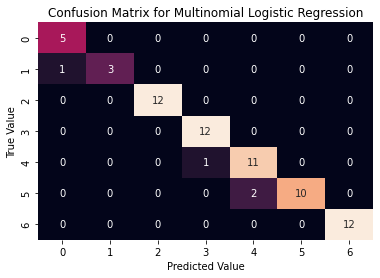

In [39]:
conf = confusion_matrix(Y_train_5, Y_pred)
ax= plt.subplot()
sns.heatmap(conf, annot=True, cbar= False, ax = ax);
plt.title('Confusion Matrix for Multinomial Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Can't plot ROC curve for multinomial logistic regression.

#### ii. Naive Bayes

**GAUSSIAN NAIVE BAYES**

In [40]:
l_value = []
error = []
accuracy = []
t_error = []
t_accuracy = []
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

for l in range(1, 21):
    col = []
    for i in range(1, 6 * l + 1):
        for j in col_names:
            col.append(j + str(i))
        
    col.append('label')
    df_10 = pd.DataFrame(columns=col)
    
    for i in train_data:
        row = []
        
        for c in columns:
            value = i[c].values 
            n = len(value)
            size = n // l

            for j in range(l):
                start = j * size
                end = (j + 1) * size if j != l - 1 else n
                d = value[start:end]
                summary = pd.Series(d).describe()

                try:
                    row.append(summary['min'])
                    row.append(summary['max'])
                    row.append(summary['mean'])
                    row.append(summary['50%'])
                    row.append(summary['std'])
                    row.append(summary['25%'])
                    row.append(summary['75%'])
                except KeyError:
                    row += [float("nan")] * 7

        row.append(i['label'].iloc[0])
        df_10 = pd.concat([df_10, pd.DataFrame([row], columns=col)], ignore_index=True)
        
    bending_label = []

    for i in df_10['label']:
        if i == 'bending1' or i == 'bending2':
            bending_label.append(1)
        else:
            bending_label.append(0)

    df_10['bending_label'] = bending_label
    
    log_df_train = df_10
    print(f"Processing l = {l}...")

    X_train = log_df_train.drop(['label'], axis=1)
    Y_train = log_df_train['label']
    
    X_train = X_train.dropna()
    Y_train = Y_train[X_train.index]
    
    model = GaussianNB()
    model.fit(X_train, Y_train)
    
    best_score = model.score(X_train, Y_train)
    best_error = 1 - best_score
    
    l_value.append(l)
    p_value.append(best_p_value)
    error.append(best_error)
    accuracy.append(best_score)

Processing l = 1...
Processing l = 2...
Processing l = 3...
Processing l = 4...
Processing l = 5...
Processing l = 6...
Processing l = 7...
Processing l = 8...
Processing l = 9...
Processing l = 10...
Processing l = 11...
Processing l = 12...
Processing l = 13...
Processing l = 14...
Processing l = 15...
Processing l = 16...
Processing l = 17...
Processing l = 18...
Processing l = 19...
Processing l = 20...


In [41]:
for l in range(1, 21):
    col = []
    for i in range(1, 6 * l + 1):
        for j in col_names:
            col.append(j + str(i))
        
    col.append('label')
    df_11 = pd.DataFrame(columns=col)
    
    for i in test_data:
        row = []
        
        for c in columns:
            value = i[c].values 
            n = len(value)
            size = n // l

            for j in range(l):
                start = j * size
                end = (j + 1) * size if j != l - 1 else n
                d = value[start:end]
                summary = pd.Series(d).describe()

                try:
                    row.append(summary['min'])
                    row.append(summary['max'])
                    row.append(summary['mean'])
                    row.append(summary['50%'])
                    row.append(summary['std'])
                    row.append(summary['25%'])
                    row.append(summary['75%'])
                except KeyError:
                    row += [float("nan")] * 7

        row.append(i['label'].iloc[0])
        df_11 = pd.concat([df_11, pd.DataFrame([row], columns=col)], ignore_index=True)
        
    bending_label = []

    for i in df_11['label']:
        if i == 'bending1' or i == 'bending2':
            bending_label.append(1)
        else:
            bending_label.append(0)

    df_11['bending_label'] = bending_label
    
    log_df_test = df_11
    print(f"Processing l = {l}...")
    
    X_test = log_df_test.drop(['label'], axis=1)
    Y_test = log_df_test['label']
    
    X_test = X_test.dropna()
    Y_test = Y_test[X_test.index]
    
    model = GaussianNB()
    model.fit(X_test, Y_test)
    
    best_test_score = model.score(X_test,Y_test)
    best_test_error = 1 - best_test_score

Processing l = 1...
Processing l = 2...
Processing l = 3...
Processing l = 4...
Processing l = 5...
Processing l = 6...
Processing l = 7...
Processing l = 8...
Processing l = 9...
Processing l = 10...
Processing l = 11...
Processing l = 12...
Processing l = 13...
Processing l = 14...
Processing l = 15...
Processing l = 16...
Processing l = 17...
Processing l = 18...
Processing l = 19...
Processing l = 20...


In [42]:
res = pd.DataFrame({
    'l': l_value,
    'Train Error': error,
    'Train Accuracy': accuracy,
    'Test Accuracy': best_test_score,
    'Test Error': best_test_error
})

display(res)

,l,Train Error,Train Accuracy,Test Accuracy,Test Error
0,1,0.000000,1.000000,1.0,0.0
1,2,0.000000,1.000000,1.0,0.0
2,3,0.014493,0.985507,1.0,0.0
3,4,0.000000,1.000000,1.0,0.0
4,5,0.014493,0.985507,1.0,0.0
5,6,0.028986,0.971014,1.0,0.0
6,7,0.000000,1.000000,1.0,0.0
7,8,0.014493,0.985507,1.0,0.0
8,9,0.000000,1.000000,1.0,0.0
9,10,0.000000,1.000000,1.0,0.0


In [43]:
best_acc = np.argmax(accuracy)
best_l_value = res['l'][best_acc]

col = []
l = best_l_value
for i in range(1, 6 * l + 1):
    for j in col_names:
        col.append(j + str(i))

col.append('label')
df_best = pd.DataFrame(columns=col)

for i in train_data:
    row = []

    for c in columns:
        value = i[c].values 
        n = len(value)
        size = n // l

        for j in range(l):
            start = j * size
            end = (j + 1) * size if j != l - 1 else n
            d = value[start:end]
            summary = pd.Series(d).describe()

            try:
                row.append(summary['min'])
                row.append(summary['max'])
                row.append(summary['mean'])
                row.append(summary['50%'])
                row.append(summary['std'])
                row.append(summary['25%'])
                row.append(summary['75%'])
            except KeyError:
                row += [float("nan")] * 7

    row.append(i['label'].iloc[0])
    df_best = pd.concat([df_best, pd.DataFrame([row], columns=col)], ignore_index=True)

bending_label = []

for i in df_best['label']:
    if i == 'bending1' or i == 'bending2':
        bending_label.append(1)
    else:
        bending_label.append(0)

df_best['bending_label'] = bending_label

df_best

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,3rd quartile_5,min_6,max_6,mean_6,median_6,std_dev_6,1st quartile_6,3rd quartile_6,label,bending_label
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,bending1,1
1,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,bending1,1
2,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,bending1,1
3,37.00,48.00,43.454958,43.25,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,24.00,0.00,5.26,0.679646,0.50,0.622534,0.4300,0.8700,bending1,1
4,36.25,48.00,43.969125,44.50,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,23.75,0.00,2.96,0.555312,0.49,0.487826,0.0000,0.8300,bending1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,walking,0
65,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650,walking,0
66,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,walking,0
67,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,walking,0


In [44]:
X_train_6 = df_best.drop(['label', 'bending_label'], axis=1)
Y_train_6 = df_best['label']

X_train_6 = X_train_6.dropna()
Y_train_6 = Y_train_6[X_train_6.index]

model_main = GaussianNB()
model = model_main.fit(X_train_6, Y_train_6)
Y_pred = model_main.predict(X_train_6)

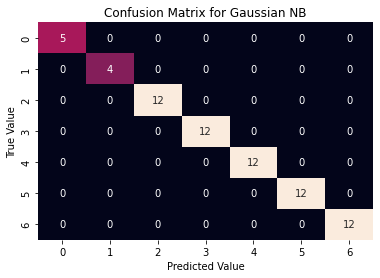

In [45]:
conf = confusion_matrix(Y_train_6, Y_pred)
ax= plt.subplot()
sns.heatmap(conf, annot=True, cbar= False, ax = ax);
plt.title('Confusion Matrix for Gaussian NB')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Can't plot ROC curve for Gaussian NB either.

**MULTINOMIAL NB**

In [46]:
l_value = []
error = []
accuracy = []
t_error = []
t_accuracy = []
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

for l in range(1, 21):
    col = []
    for i in range(1, 6 * l + 1):
        for j in col_names:
            col.append(j + str(i))
        
    col.append('label')
    df_12 = pd.DataFrame(columns=col)
    
    for i in train_data:
        row = []
        
        for c in columns:
            value = i[c].values 
            n = len(value)
            size = n // l

            for j in range(l):
                start = j * size
                end = (j + 1) * size if j != l - 1 else n
                d = value[start:end]
                summary = pd.Series(d).describe()

                try:
                    row.append(summary['min'])
                    row.append(summary['max'])
                    row.append(summary['mean'])
                    row.append(summary['50%'])
                    row.append(summary['std'])
                    row.append(summary['25%'])
                    row.append(summary['75%'])
                except KeyError:
                    row += [float("nan")] * 7

        row.append(i['label'].iloc[0])
        df_12 = pd.concat([df_12, pd.DataFrame([row], columns=col)], ignore_index=True)
        
    bending_label = []

    for i in df_12['label']:
        if i == 'bending1' or i == 'bending2':
            bending_label.append(1)
        else:
            bending_label.append(0)

    df_12['bending_label'] = bending_label
    
    log_df_train = df_12
    print(f"Processing l = {l}...")

    X_train = log_df_train.drop(['label'], axis=1)
    Y_train = log_df_train['label']
    
    X_train = X_train.dropna()
    Y_train = Y_train[X_train.index]
    
    model = MultinomialNB()
    model.fit(X_train, Y_train)
    
    best_score = model.score(X_train, Y_train)
    best_error = 1 - best_score
    
    l_value.append(l)
    p_value.append(best_p_value)
    error.append(best_error)
    accuracy.append(best_score)

Processing l = 1...
Processing l = 2...
Processing l = 3...
Processing l = 4...
Processing l = 5...
Processing l = 6...
Processing l = 7...
Processing l = 8...
Processing l = 9...
Processing l = 10...
Processing l = 11...
Processing l = 12...
Processing l = 13...
Processing l = 14...
Processing l = 15...
Processing l = 16...
Processing l = 17...
Processing l = 18...
Processing l = 19...
Processing l = 20...


In [47]:
for l in range(1, 21):
    col = []
    for i in range(1, 6 * l + 1):
        for j in col_names:
            col.append(j + str(i))
        
    col.append('label')
    df_13 = pd.DataFrame(columns=col)
    
    for i in test_data:
        row = []
        
        for c in columns:
            value = i[c].values 
            n = len(value)
            size = n // l

            for j in range(l):
                start = j * size
                end = (j + 1) * size if j != l - 1 else n
                d = value[start:end]
                summary = pd.Series(d).describe()

                try:
                    row.append(summary['min'])
                    row.append(summary['max'])
                    row.append(summary['mean'])
                    row.append(summary['50%'])
                    row.append(summary['std'])
                    row.append(summary['25%'])
                    row.append(summary['75%'])
                except KeyError:
                    row += [float("nan")] * 7

        row.append(i['label'].iloc[0])
        df_13 = pd.concat([df_13, pd.DataFrame([row], columns=col)], ignore_index=True)
        
    bending_label = []

    for i in df_13['label']:
        if i == 'bending1' or i == 'bending2':
            bending_label.append(1)
        else:
            bending_label.append(0)

    df_13['bending_label'] = bending_label
    
    log_df_test = df_13
    print(f"Processing l = {l}...")
    
    X_test = log_df_test.drop(['label'], axis=1)
    Y_test = log_df_test['label']
    
    X_test = X_test.dropna()
    Y_test = Y_test[X_test.index]
    
    model = MultinomialNB()
    model.fit(X_test, Y_test)
    
    best_test_score = model.score(X_test,Y_test)
    best_test_error = 1 - best_test_score

Processing l = 1...
Processing l = 2...
Processing l = 3...
Processing l = 4...
Processing l = 5...
Processing l = 6...
Processing l = 7...
Processing l = 8...
Processing l = 9...
Processing l = 10...
Processing l = 11...
Processing l = 12...
Processing l = 13...
Processing l = 14...
Processing l = 15...
Processing l = 16...
Processing l = 17...
Processing l = 18...
Processing l = 19...
Processing l = 20...


In [48]:
res = pd.DataFrame({
    'l': l_value,
    'Train Error': error,
    'Train Accuracy': accuracy,
    'Test Accuracy': best_test_score,
    'Test Error': best_test_error
})

display(res)

,l,Train Error,Train Accuracy,Test Accuracy,Test Error
0,1,0.072464,0.927536,1.0,0.0
1,2,0.115942,0.884058,1.0,0.0
2,3,0.086957,0.913043,1.0,0.0
3,4,0.086957,0.913043,1.0,0.0
4,5,0.072464,0.927536,1.0,0.0
5,6,0.043478,0.956522,1.0,0.0
6,7,0.057971,0.942029,1.0,0.0
7,8,0.057971,0.942029,1.0,0.0
8,9,0.057971,0.942029,1.0,0.0
9,10,0.057971,0.942029,1.0,0.0


In [49]:
best_acc = np.argmax(accuracy)
best_l_value = res['l'][best_acc]

col = []
l = best_l_value
for i in range(1, 6 * l + 1):
    for j in col_names:
        col.append(j + str(i))

col.append('label')
df_best = pd.DataFrame(columns=col)

for i in train_data:
    row = []

    for c in columns:
        value = i[c].values 
        n = len(value)
        size = n // l

        for j in range(l):
            start = j * size
            end = (j + 1) * size if j != l - 1 else n
            d = value[start:end]
            summary = pd.Series(d).describe()

            try:
                row.append(summary['min'])
                row.append(summary['max'])
                row.append(summary['mean'])
                row.append(summary['50%'])
                row.append(summary['std'])
                row.append(summary['25%'])
                row.append(summary['75%'])
            except KeyError:
                row += [float("nan")] * 7

    row.append(i['label'].iloc[0])
    df_best = pd.concat([df_best, pd.DataFrame([row], columns=col)], ignore_index=True)

bending_label = []

for i in df_best['label']:
    if i == 'bending1' or i == 'bending2':
        bending_label.append(1)
    else:
        bending_label.append(0)

df_best['bending_label'] = bending_label

df_best

,min_1,max_1,mean_1,median_1,std_dev_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,3rd quartile_35,min_36,max_36,mean_36,median_36,std_dev_36,1st quartile_36,3rd quartile_36,label,bending_label
0,40.00,45.00,44.231125,44.500,1.031429,44.3100,45.0000,38.75,46.50,43.659125,...,1.0000,0.00,1.30,0.099500,0.000,0.241797,0.0000,0.0000,bending1,1
1,35.75,47.75,43.946750,45.000,3.229635,43.7500,45.5425,35.25,47.75,43.295625,...,1.0000,0.00,1.50,0.543125,0.470,0.457427,0.0000,0.8300,bending1,1
2,36.00,45.00,41.715000,42.000,2.242549,40.0000,43.5425,33.00,45.00,39.632625,...,0.4700,0.00,1.00,0.299625,0.430,0.270023,0.0000,0.5000,bending1,1
3,41.00,46.75,44.923875,45.000,0.682991,45.0000,45.0000,42.50,48.00,44.660375,...,0.7100,0.00,4.06,0.563875,0.470,0.681275,0.0000,0.8300,bending1,1
4,40.75,44.50,42.738625,42.500,0.894612,42.0000,43.5000,41.50,45.00,43.395875,...,0.8875,0.00,1.73,0.607250,0.500,0.381944,0.4300,0.8400,bending1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,19.50,45.00,33.938875,34.375,4.860503,30.1875,37.8125,20.33,43.00,32.712375,...,4.3375,0.47,6.80,3.268625,3.255,1.533183,2.0575,4.5075,walking,0
65,22.00,44.50,34.182250,34.500,4.650889,30.6275,37.5625,21.33,43.00,34.184250,...,4.9050,0.00,8.38,3.236500,3.270,1.780036,1.9875,3.9750,walking,0
66,24.00,43.33,34.231500,34.500,4.333692,31.2500,37.5000,20.67,42.00,33.799125,...,4.5250,0.00,8.14,3.626000,3.670,1.708332,2.3575,4.8550,walking,0
67,24.75,42.75,34.681375,34.670,4.111621,32.2500,37.0000,24.33,44.00,35.108250,...,4.1875,0.47,7.18,3.467125,3.515,1.429468,2.3325,4.5000,walking,0


In [50]:
X_train_7 = df_best.drop(['label', 'bending_label'], axis=1)
Y_train_7 = df_best['label']

X_train_7 = X_train_7.dropna()
Y_train_7 = Y_train_7[X_train_7.index]

model_main = MultinomialNB()
model = model_main.fit(X_train_7, Y_train_7)
Y_pred = model_main.predict(X_train_7)

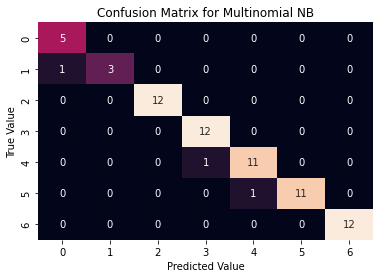

In [51]:
conf = confusion_matrix(Y_train_7, Y_pred)
ax= plt.subplot()
sns.heatmap(conf, annot=True, cbar= False, ax = ax);
plt.title('Confusion Matrix for Multinomial NB')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

#### ii. Comparison

**Q. Which method is better for multi-class classification in this problem?**<br><br>
**A.** As we can clearly see that the accuracy obtained in Gaussian NB is better than the accuracy for Multinomial NB.<br>
While all the accuracy values for Gaussian are in the higher end of 0.98-1, with few values being 1, all accuracy values using l1 penalized is lower than that.

## 3. ISLR 4.8.3

![](ISLR_4.8.3.jpeg)

## 4. ISLR 4.8.7

![](ISLR_4.8.7(i).jpeg)

![](ISLR_4.8.7(ii).jpeg)

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9

**References**<br>
1. ChatGPT Prompt: - How to handle cases where the series length is not perfectly divisible by l
2. https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e
3. https://scikit-learn.org/1.1/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
4. ChatGPT Prompt: How to tackle the "Too many indexer" error.
5. ChatGPT Prompt: How to do avoid warnings in sm.Logit.
6. ChatGPT Prompt: How to insert image in Jupyter Notebook